<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/chest_xray_pneumonia/chest_xray_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imagedatagenerator 없이 구현해보기

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leemj5000","key":"9761000ca5f89a908cb4e6462dad9e0b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 25.8MB/s]
100% 2.29G/2.29G [00:29<00:00, 83.0MB/s]


In [ ]:
!unzip '/content/chest-xray-pneumonia.zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NO

In [ ]:
from PIL import Image
import numpy as np
import cv2

# 뒤에 .convert('L')붙이면 grayscale로 바꿔준다.
#image = Image.open('/content/chest_xray/train/PNEUMONIA/person1642_bacteria_4353.jpeg').convert('L')
image = Image.open('/content/chest_xray/train/PNEUMONIA/person803_bacteria_2710.jpeg')

img = np.array(image,'uint8')
print(img.shape)
#print(img[:10])
print(np.min(img[0]), np.max(img[0]))
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img.resize((64,64))
print(img.shape)

(467, 745, 3)
30 179
(467, 745)


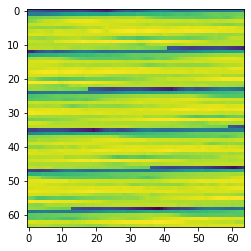

In [ ]:
import matplotlib.pyplot as plt
img.resize((64,64))
plt.imshow(img)
plt.show()

In [ ]:
import os, glob

train_dir = '/content/chest_xray/train/'
test_dir = '/content/chest_xray/test/'
val_dir = '/content/chest_xray/val/'
categories = ['NORMAL','PNEUMONIA']

file_list = os.listdir(test_dir + categories[1])

In [ ]:
print(file_list)

['person108_bacteria_504.jpeg', 'person109_bacteria_513.jpeg', 'person78_bacteria_385.jpeg', 'person93_bacteria_453.jpeg', 'person3_virus_17.jpeg', 'person172_bacteria_827.jpeg', 'person22_virus_54.jpeg', 'person94_bacteria_457.jpeg', 'person173_bacteria_831.jpeg', 'person78_bacteria_387.jpeg', 'person85_bacteria_423.jpeg', 'person101_bacteria_483.jpeg', 'person81_bacteria_397.jpeg', 'person23_virus_56.jpeg', 'person78_bacteria_382.jpeg', 'person1673_virus_2889.jpeg', 'person1622_virus_2810.jpeg', 'person53_virus_108.jpeg', 'person127_bacteria_602.jpeg', 'person130_bacteria_623.jpeg', 'person1618_virus_2805.jpeg', 'person102_bacteria_487.jpeg', 'person119_bacteria_568.jpeg', 'person130_bacteria_625.jpeg', 'person76_virus_138.jpeg', 'person1614_virus_2800.jpeg', 'person1671_virus_2887.jpeg', 'person54_virus_109.jpeg', 'person25_virus_59.jpeg', 'person121_bacteria_575.jpeg', 'person134_bacteria_642.jpeg', 'person111_bacteria_536.jpeg', 'person85_bacteria_421.jpeg', 'person72_virus_133.jp

In [ ]:
def get_file_path(path):
  return os.listdir(path + categories[0]), os.listdir(path + categories[1])

In [ ]:
train_normal_path, train_pneumonia_path = get_file_path(train_dir)
test_normal_path, test_pneumonia_path = get_file_path(test_dir)
val_normal_path, val_pneumonia_path = get_file_path(val_dir)

In [ ]:
import tensorflow as tf
def get_image(dir,data_paths_0,data_paths_1):


  for i in range(len(categories)):
    arr = []
    if i == 0:
      data_paths = data_paths_0
    else:
      data_paths = data_paths_1

    for data_path in data_paths:
      image = Image.open(dir+categories[i]+"/"+data_path)
      image = image.resize((299,299))
      image = np.array(image)
      if image.shape == (299,299,3):
        continue
      else:
        arr.append(image)

    if i == 0:
      nor_arr = arr
    else:
      pne_arr = arr
  return nor_arr, pne_arr


In [ ]:
train_normal, train_pneumonia = get_image(train_dir,train_normal_path, train_pneumonia_path)
test_normal, test_pneumonia = get_image(test_dir,test_normal_path, test_pneumonia_path)
val_normal, val_pneumonia = get_image(val_dir,val_normal_path, val_pneumonia_path)

In [ ]:
type(train_normal)

list

In [ ]:
print(type(train_normal[0]))

<class 'numpy.ndarray'>


In [ ]:
train_X = train_normal + train_pneumonia
train_Y = [0 for i in range(len(train_normal))]+[1 for i in range(len(train_pneumonia))]

In [ ]:
test_X = test_normal + test_pneumonia
test_Y = [0 for i in range(len(test_normal))] + [1 for i in range(len(test_pneumonia))]

In [ ]:
val_X = val_normal + val_pneumonia
val_Y = [0 for i in range(len(val_normal))] + [1 for i in range(len(val_pneumonia))]

In [ ]:
# 훈련데이터 셔플
import random
combine = list(zip(train_X, train_Y))
random.shuffle(combine)
train_X , train_Y = list(zip(*combine))

In [ ]:
print(type(train_X))
print(type(train_Y))

<class 'tuple'>
<class 'tuple'>


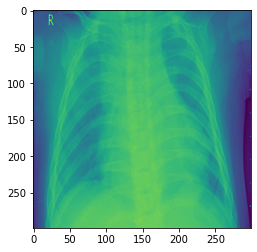

(299, 299)


In [ ]:
plt.imshow(train_X[0])
plt.show()
print(train_X[0].shape)

In [ ]:
train_Y = np.array(train_Y)
train_X = np.array(train_X)
test_X = np.array(test_X)
test_Y = np.array(test_Y)
val_X = np.array(val_X)
val_Y = np.array(val_Y)

In [ ]:
print(train_X.shape)

(4933, 299, 299)


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 299,299,1).astype('float32')/255
test_X = test_X.reshape(test_X.shape[0], 299,299,1).astype('float32')/255
val_X = val_X.reshape(val_X.shape[0], 299,299,1).astype('float32')/255

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
print(val_X.shape)

(4933, 299, 299, 1)
(4933,)
(624, 299, 299, 1)
(624,)
(16, 299, 299, 1)


In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 32, kernel_size=(9, 9), input_shape=(299,299,1), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Conv2D(filters = 64, kernel_size=(7,7), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Conv2D(filters = 128, kernel_size=(5,5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Conv2D(filters = 256, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 291, 291, 32)      2624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 145, 145, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 139, 139, 64)      100416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 69, 69, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 65, 65, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 256)       2

In [ ]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(train_X, train_Y, epochs=100, validation_data=(val_X, val_Y), batch_size= 32,
#                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

/bin/bash: -c: line 0: syntax error near unexpected token `MODEL_DIR'
/bin/bash: -c: line 0: `os.mkdir(MODEL_DIR)'
Epoch 1/100
155/155 [==============================] - ETA: 0s - loss: 0.6223 - accuracy: 0.7219
Epoch 00001: val_loss improved from inf to 0.49001, saving model to ./content/chest_xray/model/01-0.4900.hdf5
155/155 [==============================] - 18s 119ms/step - loss: 0.6223 - accuracy: 0.7219 - val_loss: 0.4900 - val_accuracy: 0.8125
Epoch 2/100
154/155 [============================>.] - ETA: 0s - loss: 0.4803 - accuracy: 0.8064
Epoch 00002: val_loss did not improve from 0.49001
155/155 [==============================] - 18s 117ms/step - loss: 0.4799 - accuracy: 0.8066 - val_loss: 0.6687 - val_accuracy: 0.6875
Epoch 3/100
154/155 [============================>.] - ETA: 0s - loss: 0.3176 - accuracy: 0.8762
Epoch 00003: val_loss improved from 0.49001 to 0.27786, saving model to ./content/chest_xray/model/03-0.2779.hdf5
155/155 [==============================] - 18s 118m

Text(0, 0.5, 'loss')

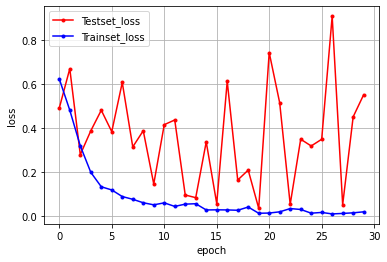

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = '/content/chest_xray/model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=100, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

print('\n Test Accuracy : %.4f'%(model.evaluate(test_X, test_Y)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
model.evaluate(test_X,test_Y)

20/20 [==============================] - 1s 40ms/step - loss: 2.4680 - accuracy: 0.7612


[2.468043088912964, 0.7612179517745972]